# Plant Village Model Using Colab

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Importing Fastai

In [7]:
from fastai.vision import *
from fastai.metrics import error_rate
import cv2

## Importing Google Drive

In [3]:
pwd

'C:\\Users\\Murtaza\\Plant_Diseases'

In [4]:
# bs = 64
bs = 32   

## Generating DataBunch

In [8]:
#path = '/home/sorry/tensorflow1/DeepLearning_PlantDiseases-master/PlantVillage/PlantVillage/train'
path1 = 'Dataset/train'
#path = '/content/drive/My Drive/Colab Notebooks/Corn_Data'

In [9]:
path1

'Dataset/train'

In [10]:
data = ImageDataBunch.from_folder(path1, valid_pct =0.2, ds_tfms=get_transforms(), size=224,num_workers=4, bs=bs
                                  ).normalize(imagenet_stats)

In [11]:
len(data.valid_ds)

5082

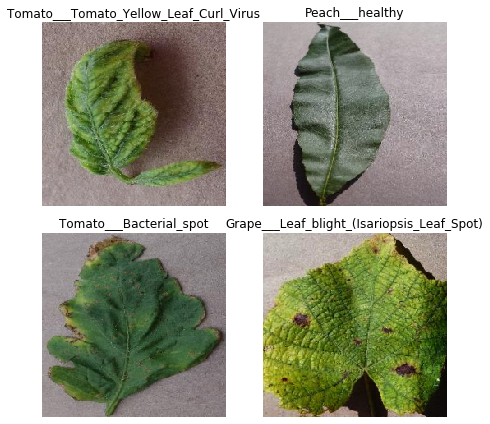

In [23]:
data.show_batch(rows=2, figsize=(7,6))

In [24]:
print(data.classes)
len(data.classes),data.c

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


(25, 25)

## Model Training: VGG16

In [25]:
learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy)

In [26]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [27]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.341416,0.144422,0.951987,02:11
1,0.195070,0.086486,0.972845,02:10


In [28]:
#learn.save('ResNet50')

In [29]:
preds,y = learn.get_preds()
interp = ClassificationInterpretation(learn, preds, y, losses=nn.CrossEntropyLoss)

In [30]:
#len(data.Test_ds)

## Checking Model Results

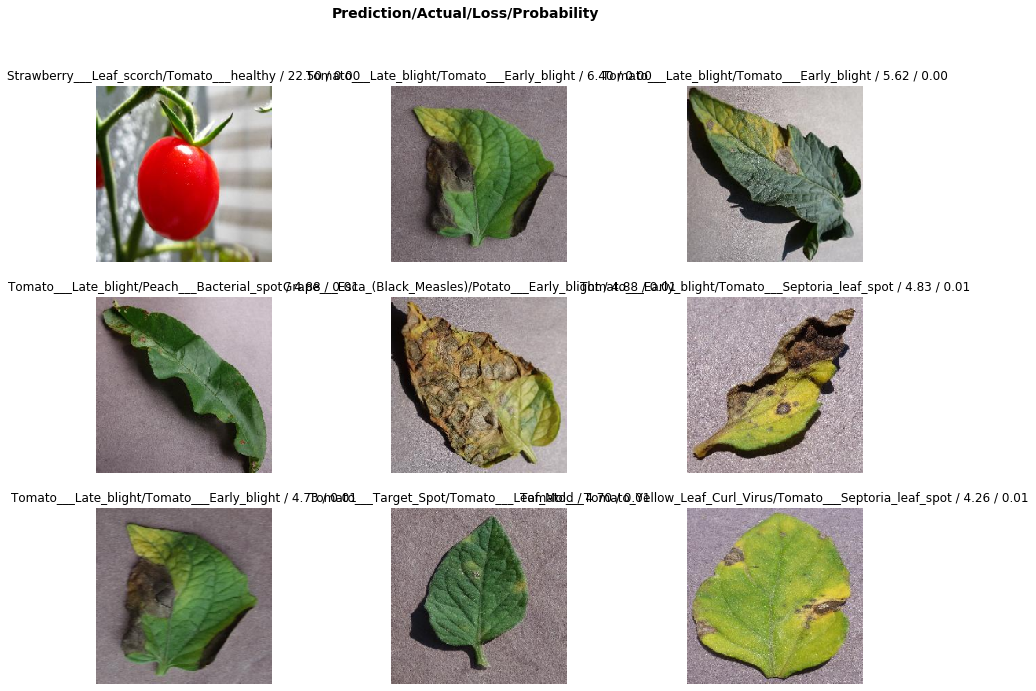

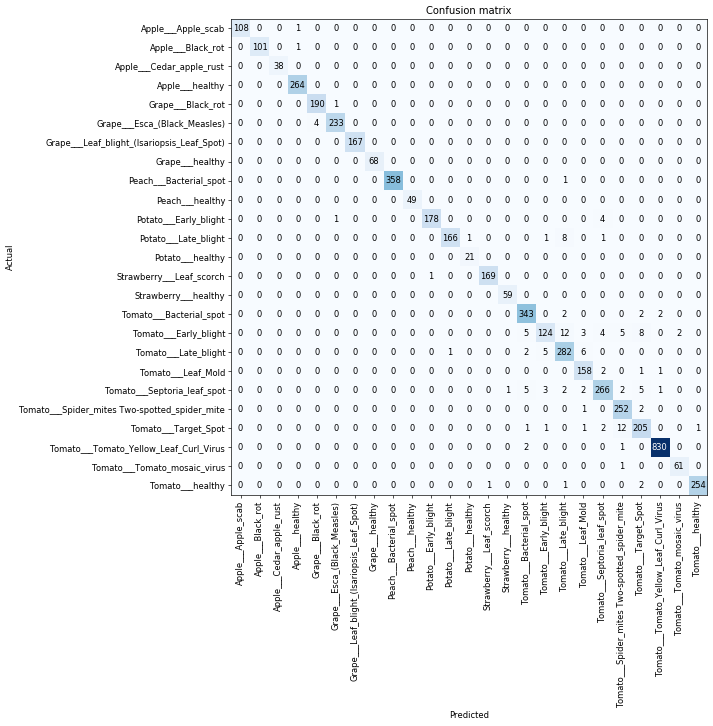

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,11))

doc(interp.plot_top_losses)

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [32]:
interp.most_confused(min_val=2)

[('Tomato___Early_blight', 'Tomato___Late_blight', 12),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 12),
 ('Potato___Late_blight', 'Tomato___Late_blight', 8),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 8),
 ('Tomato___Late_blight', 'Tomato___Leaf_Mold', 6),
 ('Tomato___Early_blight', 'Tomato___Bacterial_spot', 5),
 ('Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 5),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 5),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Bacterial_spot', 5),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 5),
 ('Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 4),
 ('Potato___Early_blight', 'Tomato___Septoria_leaf_spot', 4),
 ('Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 4),
 ('Tomato___Early_blight', 'Tomato___Leaf_Mold', 3),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 3),
 ('Tomato___Bacterial_spot', 'Tomato___Late_blight', 2),
 ('Tomato___Bacterial_spot', '

In [33]:
#learn.save('For_Validation_R50_90_10')
learn.export('VGG16_80_20.pkl')